# Assignment group 2: Network and exploratory data analysis

## Module C _(40 pts)_ Exploring a network of ingredients
In This section we're going to experiment with some recipes data, but think of them as a network. These data can be obtained from Kaggle:

- https://www.kaggle.com/kaggle/recipe-ingredients-dataset

and are packaged with the assignment in the following directory:

- `./data/train.json`

In [1]:
#Libraries in use:
from pprint import pprint
from collections import defaultdict
import json
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

__C1.__ _(2 pts)_ To start, load the recipe data from `json` format and print the first 5 recipes.

In [2]:
with open('data/train.json', 'r') as f:
    recipes = json.load(f)

In [3]:
pprint(recipes[:5])
print(len(recipes))
#it is a list of dictionaries with cuisines names, ids and ingredients and it has 39774 recipies

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

__C2.__ _(5 pts)_ Build an _undirected_ network representation of the ingredients data using the NetworkX module using the `.Graph()` graph type. In particular, for this network each ingredient will represent a node, and when two ingredients appear in the same recipe there should be a link drawn between them.

<font color=blue>Make a more suitable data structure for the recipes to make a network:</font>

In [4]:
CUISINE = list(list(recipe['ingredients']) for recipe in recipes)

In [5]:
CUISINE[:1]

[['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']]

In [6]:
ingredients = set() #define a set to avoid duplicates
for eachCUISINE in CUISINE:
    for eachelement in eachCUISINE:
        ingredients.add(eachelement)
nodes = np.array(list(ingredients))

In [7]:
G = nx.Graph() #initiate the graph

In [8]:
G.add_nodes_from(nodes) #nodes
for rec in CUISINE: #edges
    for each_ing in rec:
        G.add_edges_from([(each_ing, t) for t in rec if t != each_ing])

__C3.__ _(8 pts)_ Utilize NetworkX and the ingredients network and find the node degrees, i.e., numbers of connections to other ingredients across the recipes. Use this to compute the network's average and median degrees, and to print the top $5$ ingredients by degree. Discuss this output and how it helps you to understand if you've constructed the network correctly.

<font color=blue>The degree is the sum of the edge weights adjacent to the node. Mean of the degrees is the average number of edges which shows the average density of the graph. Median is the middle point of the edge numbers. Based on the values of the mean and median it seems like that most of the ingredients are present in more than 38 recipes.</font>

In [9]:
mean_degree = np.mean(np.array([elem[1] for elem in G.degree]))
median_degree = np.median(np.array([elem[1] for elem in G.degree]))

In [10]:
print("Mean degree is: "+str(mean_degree))
print("Median degree is: "+str(median_degree))

Mean degree is: 142.96127494787012
Median degree is: 38.0


In [11]:
pprint(sorted(G.degree, key=lambda x: x[1], reverse = True)[:5])

[('salt', 4879),
 ('water', 3892),
 ('onions', 3661),
 ('garlic', 3543),
 ('sugar', 3435)]


__C4.__ _(7 pts)_ Now, for each degree $k$ your job is to count up the number of nodes $n_k$ that have degree $k$. Store the unique values of $k$ in a list called `degree_numbers` and the corresponding values $n_k$ in a list called `degree_counts`. Sort these two lists in order of decreasing $k$ and print the five most common degree numbers.

Comment on the top five most common degree numbers (the mode) and any difference in these values from the average and median degrees, reported in __C3__ in the response box below. Do you believe these data are skewed?

\[Hint: `from collections import Counter` for an object type that will make the counting and sorting processes very easy when starting from a list of `degrees`.\] 

<font color=blue>Mode values are very close to average/median which is predictable. It means most of the data are around the middle point. Since we have outliers that are very far from the average, i.e salt or onions, the median is a better estimate for the middle point than the average. That is why the mode values are closer to the median. The data is skewed to the right.</font>

In [12]:
degree_num_list = [item[1] for item in G.degree]
degree_numbers = sorted(list(set(degree_num_list)), reverse = True)

In [13]:
counter_degree = Counter(item for item in degree_num_list)
degree_counts_unsorted = []
for eachk in degree_numbers:
    degree_counts_unsorted.append(counter_degree[eachk])  

In [14]:
degree_counts = sorted(degree_counts_unsorted, reverse = True)

In [15]:
degree_numbers[:5] #five highest degrees:

[4879, 3892, 3661, 3543, 3435]

In [16]:
degree_counts[:5] #frequency of the most frequent degree number

[174, 169, 162, 155, 150]

In [17]:
mode_degree = sorted(counter_degree, key=counter_degree.get, reverse=True)[:5]

In [18]:
mode_degree

[13, 10, 9, 8, 12]

__C5.__ _(5 pts)_ Your next job is to visualize the `degree_numbers` and `degree_counts` data. In particular, create a scatter plot of the _logarithms_ of these values, using the numpy utility `np.log10()` on each. 

When you've generated the visualization, complete with labels for both axes, describe any visual trends that you see in the markdown box below. Do the two (transformed) quantities appear to exhibit a relationship?

<font color=blue>As predicted the maximum frequency is at degree of 10(median)[log 10 = 1] and as the degree increases, the frquency drops to lower values. We can also see the data is skewed to the right due to the tail on the right side.</font>

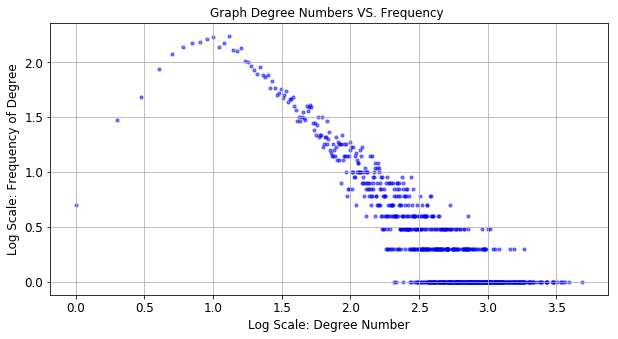

In [19]:
## set the figure dimensions
scat_fig = plt.figure(figsize = (10, 5))
## make a scatter plot
_  = plt.scatter(
    np.log10(np.array(degree_numbers)), np.log10(np.array(degree_counts_unsorted)), 
    color = "blue", s = 10, alpha = 0.5)
## Set the tick and label fontsize
plt.tick_params(labelsize = 12)
## Set the title
_ = plt.title("Graph Degree Numbers VS. Frequency ", fontsize = 12)
## Set the y-label
_ = plt.ylabel("Log Scale: Frequency of Degree", fontsize = 12)
## Set the y-label
_ = plt.xlabel("Log Scale: Degree Number", fontsize = 12)
_ = plt.grid()

__C6.__ _(3 pts)_ For a give node $u$ in our network $G$, let $\Gamma(u)$ denote the set of $u$'s neighbors, i.e., set of nodes linked to $u$.

In this part of the assignment we'll be utilizing the Jaccard coefficient (__Chapter 3.1.5.2__) similarity function on neighborhoods of nodes to determine the foods most likely to link to one anothers, i.e., appear in a recipe together heretofore unseen.

In particular, the Jaccard coefficient of nodes $u$ and $v$ is defined as

$$\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$$

where $\Gamma(u)$ denotes the set of neighbors of $u$ and can be computed through networkx utilizing the `nx.jaccard_coefficient(G, ebunch=None)` utility.

To begin, apply the `nx.jaccard_coefficient()` function to a few seemingly dispirate and a few seemingly similar ingredients (to your sensibilities). Once this is done, remark on the function of the measure in the response box below. Does this measure work as expected?

<font color=blue>This does not work like similarity. The coefficient is higher if the probability of using both ingredients in one recipe is high. In this case, salt and pepper have larger coefficient than oil and butter.</font> 

In [20]:
jaccard_coefficient = list(nx.jaccard_coefficient(G, 
                         [('pepper', 'salt'), ('double cream', 'bay leaf'), 
                          ('butter', 'oil'), ('purple onion', 'onions'), 
                          ('olive oil', 'onions'), ('onions', 'salt')]))

In [21]:
for u, v, p in jaccard_coefficient:
    print(u +" and " + v + ":" + str(p))

pepper and salt:0.5806646525679758
double cream and bay leaf:0.09867549668874172
butter and oil:0.40203850509626277
purple onion and onions:0.4453592814371258
olive oil and onions:0.6233111976185024
onions and salt:0.6201859229747676


__C7.__ _(5 pts)_ Next, create a list of node `names` using the `G.nodes()` method and corresponding adjacency matrtix from `nx.to_numpy_matrx()`. With these, create a function called `unlinked(v)` that returns a list of the names of all other nodes (ingredients) for which the node (queried ingredient) $v$ shares no link. 

Compare the size of outputs from this function when the two nodes `'salt'` and `'chocolate'` are queried, and comment in the response box below. Does the output make sense?

<font color=blue>Length of the output for chocolate is much more than it taht of salt because salt is a more common ingredient and has less unlinked nodes. So it makes sense!</font> 

In [22]:
names = [x for x in G.nodes()]

In [23]:
len(names)

6714

In [24]:
names[:10] 

['vanilla glaze',
 'Jack Daniels Whiskey',
 'pain au levain',
 'tapioca starch',
 'wheat bran',
 'whole wheat bread dough',
 'ricotta cheese',
 'fine granulated sugar',
 'red velvet cake mix',
 'frozen cheese ravioli']

In [25]:
adj_matrix_G = nx.to_numpy_matrix(G)

In [26]:
adj_matrix_G

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
np.count_nonzero(adj_matrix_G)

959842

In [28]:
adj_matrix_G.shape

(6714, 6714)

In [29]:
def unlinked(v):
    row = names.index(v)
    unlinked_list = []
    for i, elem in enumerate(adj_matrix_G[row].tolist()[0]):
        if elem: #non-zero
            pass
        else: #zero
            unlinked_list.append(names[i])
    return unlinked_list

In [30]:
len(unlinked('salt'))

1835

In [31]:
len(unlinked('chocolate'))

6516

__C8.__ _(5 pts)_ Finally, write a function called `likely_ingredients(v)` that computes the Jaccard coefficients for all nodes returned by our previous functiton, i.e., from calling `unlinked(v)`. Return the these ingredient pairs and coefficients sorted by the coefficient values and print the top $5$ hits for a few different examples. 

Finally, in the response box below address the following question

> Do you think this analysis provides information more usefule for determining substitutions, for constructing new recipes pairings? Do you htink this could support either or both interests, and if so, how?

<font color=blue>The analysis succesfully gives similar ingredients for substitutions and also it is suitable for constructing new recipes because we look for unlinked ingredients and find the most similar ones which gives us a chance for new combinations.</font> 

In [32]:
def likely_ingredients(v):
    jaccard_pairs = []
    unlinked_ings = unlinked(v)
    jaccard = list(nx.jaccard_coefficient(G, [(v, x) for x in unlinked_ings]))
    for node, othernode, p in jaccard:
        jaccard_pairs.append((node, othernode, p))
    sorted_jaccard_pairs = sorted(jaccard_pairs, key=lambda x: x[2], reverse = True)
    return sorted_jaccard_pairs

In [33]:
likely_chocolate = likely_ingredients('chocolate')[1:6] #first one is always the node itself!

In [34]:
pprint(likely_chocolate)

[('chocolate', 'instant espresso powder', 0.255663430420712),
 ('chocolate', 'whole almonds', 0.2490974729241877),
 ('chocolate', 'mexican chocolate', 0.23986486486486486),
 ('chocolate', 'semi-sweet chocolate morsels', 0.23780487804878048),
 ('chocolate', 'coffee liqueur', 0.23015873015873015)]


In [35]:
likely_chicken = likely_ingredients('chicken')[1:6] #first one is always the node itself!

In [36]:
pprint(likely_chicken)

[('chicken', 'grape tomatoes', 0.2931139549055454),
 ('chicken', 'bread crumb fresh', 0.25644171779141106),
 ('chicken', 'yellow squash', 0.2535031847133758),
 ('chicken', 'hot red pepper flakes', 0.2527881040892193),
 ('chicken', 'extra firm tofu', 0.24952137843012126)]
